# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

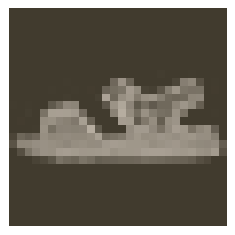

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
from collections import OrderedDict

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
# TODO: Define your network architecture here
input_size = 784
hidden_sizes = [256, 128, 64, 32]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                      ('relu3', nn.ReLU()),
                      ('fc4', nn.Linear(hidden_sizes[2], hidden_sizes[3])),
                      ('relu4', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[3], output_size))]))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [5]:
print('Initial weights - ', model.fc1.weight)

images, labels = next(iter(trainloader))

images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model.fc1.weight.grad)
optimizer.step()
print('Updated weights - ', model.fc1.weight)

Initial weights -  Parameter containing:
tensor([[ 0.0064, -0.0215, -0.0141,  ...,  0.0147,  0.0323,  0.0239],
        [ 0.0289, -0.0218, -0.0105,  ...,  0.0139, -0.0128, -0.0131],
        [ 0.0150, -0.0186, -0.0225,  ...,  0.0180,  0.0054, -0.0242],
        ...,
        [-0.0294,  0.0351, -0.0192,  ...,  0.0015,  0.0073, -0.0084],
        [ 0.0119,  0.0164, -0.0269,  ...,  0.0322, -0.0260,  0.0269],
        [ 0.0005,  0.0107,  0.0128,  ..., -0.0094, -0.0275, -0.0166]],
       requires_grad=True)
Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0001,  0.0000,  0.0000],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0004,  0.0003,  0.0003],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0003,  0.0004,  0.0004],
        ...,
        [-0.0001, -0.0001, -0.0001,  ..., -0.0002, -0.0002, -0.0001],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
Updated weights -  Parameter containing:
tensor([[ 0.

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# TODO: Create the network, define the criterion and optimizer
optimizer = optim.SGD(model.parameters(), lr=0.075)


In [7]:
model.fc1.weight.data.normal_(std=0.01)
model.fc2.weight.data.normal_(std=0.01)
model.fc3.weight.data.normal_(std=0.01)
model.fc3.weight.data.normal_(std=0.01)

tensor([[-0.0033, -0.0070, -0.0066,  ..., -0.0044, -0.0004,  0.0005],
        [-0.0004,  0.0006,  0.0115,  ..., -0.0043,  0.0004,  0.0016],
        [-0.0095,  0.0006, -0.0175,  ..., -0.0037,  0.0097, -0.0124],
        ...,
        [ 0.0060, -0.0099,  0.0056,  ...,  0.0168,  0.0054, -0.0193],
        [-0.0018, -0.0044,  0.0047,  ...,  0.0070, -0.0056, -0.0061],
        [-0.0043, -0.0124,  0.0132,  ..., -0.0165, -0.0097,  0.0046]])

In [8]:
# TODO: Train the network here
epochs = 8
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0


Epoch: 1/8...  Loss: 2.3097
Epoch: 1/8...  Loss: 2.3036
Epoch: 1/8...  Loss: 2.3018
Epoch: 1/8...  Loss: 2.3012
Epoch: 1/8...  Loss: 2.3024
Epoch: 1/8...  Loss: 2.3003
Epoch: 1/8...  Loss: 2.2968
Epoch: 1/8...  Loss: 2.2852
Epoch: 1/8...  Loss: 2.1951
Epoch: 1/8...  Loss: 1.8916
Epoch: 1/8...  Loss: 1.7065
Epoch: 1/8...  Loss: 1.6396
Epoch: 1/8...  Loss: 1.6237
Epoch: 1/8...  Loss: 1.5107
Epoch: 1/8...  Loss: 1.4157
Epoch: 1/8...  Loss: 1.3320
Epoch: 1/8...  Loss: 1.3114
Epoch: 1/8...  Loss: 1.2328
Epoch: 1/8...  Loss: 1.0452
Epoch: 1/8...  Loss: 1.0004
Epoch: 1/8...  Loss: 0.9236
Epoch: 1/8...  Loss: 0.9399
Epoch: 1/8...  Loss: 0.8362
Epoch: 2/8...  Loss: 0.4954
Epoch: 2/8...  Loss: 0.8351
Epoch: 2/8...  Loss: 0.7957
Epoch: 2/8...  Loss: 0.8389
Epoch: 2/8...  Loss: 0.7197
Epoch: 2/8...  Loss: 0.7476
Epoch: 2/8...  Loss: 0.7376
Epoch: 2/8...  Loss: 0.6881
Epoch: 2/8...  Loss: 0.6775
Epoch: 2/8...  Loss: 0.6431
Epoch: 2/8...  Loss: 0.7005
Epoch: 2/8...  Loss: 0.6644
Epoch: 2/8...  Loss:

tensor(7)


C:\Users\jdmcd\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


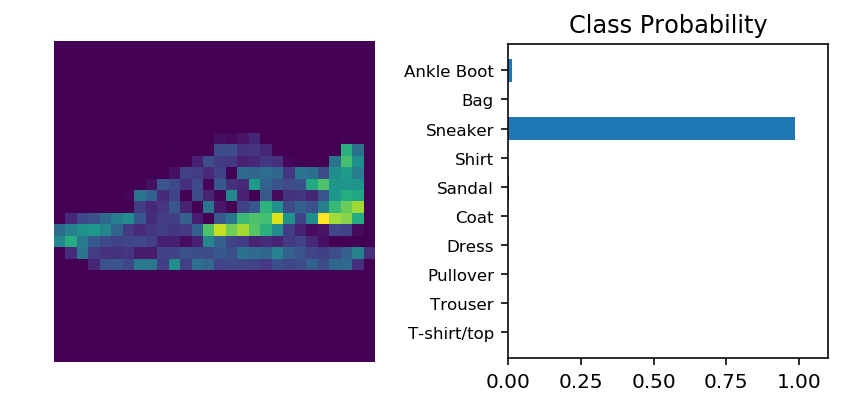

In [36]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
print(labels[0])
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(img)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(logits)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.